# Evaluación 3

---



**Autor:**
+ Integrante 1: Jocsan Riquelme Mella

+ Integrante 2: Luis Campos Cáceres

**Correo Electrónico:**
+ Integrante 1: jocsan.riquelme2201@alumnos.ubiobio.cl
+ Integrante 2: luis.campos2201@alumnos.ubiobio.cl

**Fecha de Creación:** 6 de Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-08 23:12:00--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.05s   

2025-06-08 23:12:01 (8.05 MB/s) - ‘dataset_churn_2025.csv’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

# Actividades Iniciales

In [ ]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error,f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import OrdinalEncoder

# Carga de la data

In [ ]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [ ]:
data.shape

(15000, 7)

✅ **Interpretación**

+ Existen 15.000 Clientes

+ De cada cliente se tienen 7 caracteristicas

In [ ]:
data.describe()

,age,months_active,monthly_spend,support_calls,has_discount,churn
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,45.999400,29.946333,105.602195,1.998800,0.293467,0.334133
std,16.412736,17.073296,54.607273,1.416474,0.455366,0.471702
min,18.000000,1.000000,10.010000,0.000000,0.000000,0.000000
25%,32.000000,15.000000,58.770000,1.000000,0.000000,0.000000
50%,46.000000,30.000000,106.210000,2.000000,0.000000,0.000000
75%,60.000000,45.000000,152.312500,3.000000,1.000000,1.000000
max,74.000000,59.000000,199.980000,10.000000,1.000000,1.000000


✅ **Interpretación**
+ Age
  + Una importante concentración de los clientes, tiene una edad dentro del intervalo [29;61] años [μ−σ;μ+σ] de edad.
  + El 75% de los clientes tiene una edad igual o inferior a 60 años.
  + El 25% de los clientes tiene una edad igual o inferior a
  32 años.
+ Months Active
  + Una importante concentración de los clientes, tiene   una suscripcion dentro del intervalo [12;46] Meses [μ−σ;μ+σ] de suscripción activa.
  + El 75% de los clientes tiene una suscripcion activa igual o inferior a 45 meses.
  + El 25% de los clientes tiene una suscripcion activa igual o inferior a 15 meses.

# Revisión de tipos de variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


✅ **Interpretación**

+ Se aprecia la existencia de 6 variables cuantitativas y 1 cualitativa.
+ No se aprecia la existencia de valores nulos.

# Revision de la distribución de clases

In [ ]:
data.groupby("churn").size()

,0
churn,
0,9988
1,5012


✅ **Interpretación**
+ Podemos apreciar que hay un desequilibrio, por tanto habra sesgo en el resultado final.

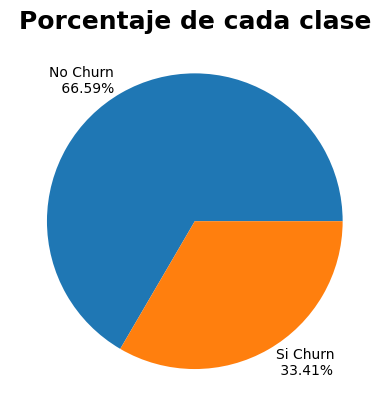

In [ ]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.churn == 0.0].shape[0],
                   data[data.churn == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No Churn\n ' + labels[0]
labels[1] = 'Si Churn\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()


✅ **Interpretación**

+  La variable presenta una distribucion desbalanceada de clases.

# Preparación de los datos


In [ ]:
#Transformar las variables cualitativas en cuantitativas
#Definir el orden de las categorias de para"Contract_Type"
contract_type_orden=['mes_a_mes','1_ano','2_anos']

#Crear el objeto OrdinalEncoder y aplicar la transformacion al data
contract_Encoder= OrdinalEncoder(categories=[contract_type_orden])
data[['contract_type']]=contract_Encoder.fit_transform(data[['contract_type']])


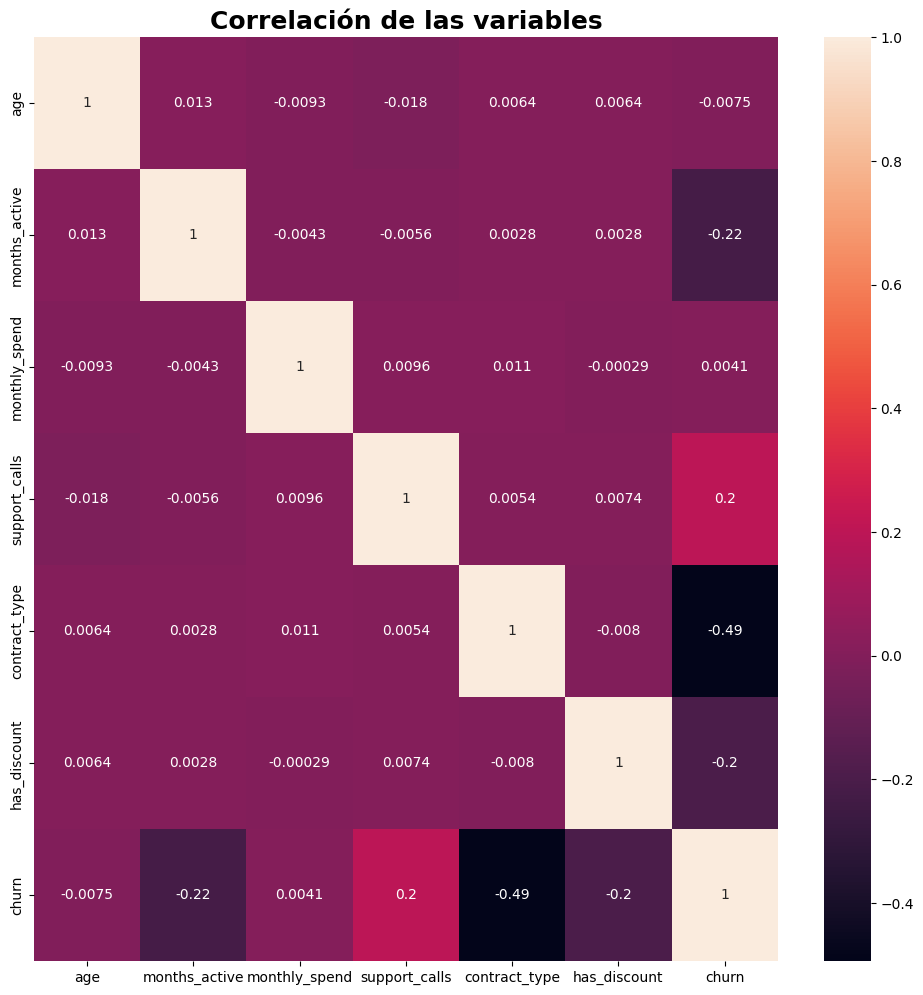

In [ ]:
#Correlacion de pearson

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()


✅ Interpretación
+ Considerando que la variable objetivo es la que indica si el cliente presenta una mayor o menor probabilidad de abandonar el servicio, se obtienen estos comentarios acerca de la matriz.
  + 4 de las 7 variables presentan una correlacion negativa con la variable objetivo.
  + 2 de las 7 variables presentan una correlacion positiva con la variable objetivo.


In [ ]:
correlation_matrix=data.corr()
churn_correlation=correlation_matrix["churn"]
df_correlation=pd.DataFrame(churn_correlation)
df_correlation.columns=["correlation"]
df_correlation.sort_values("correlation",ascending=False)

,correlation
churn,1.000000
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644
contract_type,-0.493645


+ Existe 1 variable que presenta una correlacion positiva superior a 0.1 con la variable objetivo.
+ Existen 3 variables que presentan una correlacion negativa superior a 0.1 con lo variable objetivo.
+ Las cuatro variables pueden ser posibles predictoras del modelo, por lo que se elegiran como variables independientes.


# Analisis de los datos


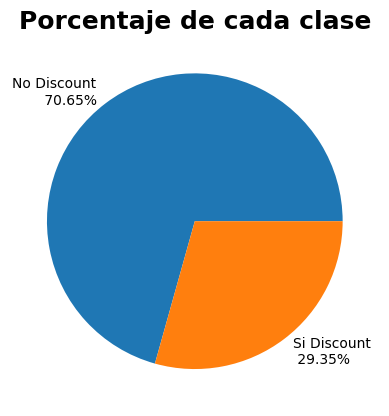

In [ ]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.has_discount == 0.0].shape[0],
                   data[data.has_discount == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No Discount\n ' + labels[0]
labels[1] = 'Si Discount\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

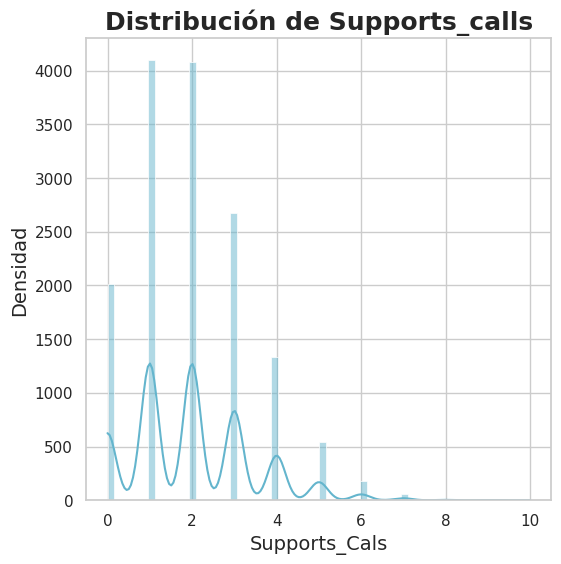

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data['support_calls'], kde = True, color = 'c')
plt.title('Distribución de Supports_calls', fontsize = 18, fontweight="bold")
plt.xlabel("Supports_Cals", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

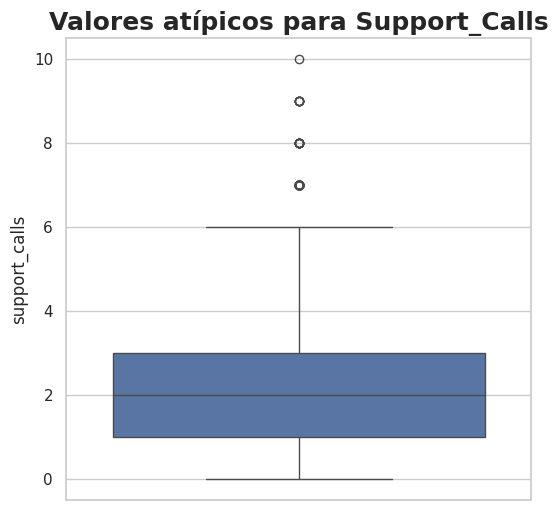

In [ ]:
#REVISION ATIPICOS

plt.figure(figsize=(6,6))
plt.title("Valores atípicos para Support_Calls", fontsize=18, fontweight="bold")
plt.ylabel("support_calls")
sns.boxplot(y='support_calls',data=data);


In [ ]:
# Identifica los valores atìpicos
# Calculate IQR
IQR = np.quantile(data.support_calls, 0.75) - np.quantile(data.support_calls, 0.25)
# Calculate the upper limit for outliers
limite = np.quantile(data.support_calls, 0.75) + IQR*1.5

outlier_max=data[data.support_calls > limite]['support_calls'].max()
print(f'Max outlier: {outlier_max}')

data[data.support_calls > limite].head(5)


Max outlier: 10


,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
256,19,4,49.22,8,0.0,1,1
461,52,28,70.25,7,0.0,1,1
566,66,22,156.33,7,1.0,0,0
825,71,23,54.68,7,0.0,1,1
837,29,48,153.14,7,2.0,0,0


**Comentarios acerca de support_calls**
+ La mayor cantidad de llamadas a soporte son 10.
+ El promedio de llamadas a soporte son 2.
+ El 75% de los clientes ha hecho 3 o menos llamadas a soporte.
+ Existen valores atipicos(outliers).

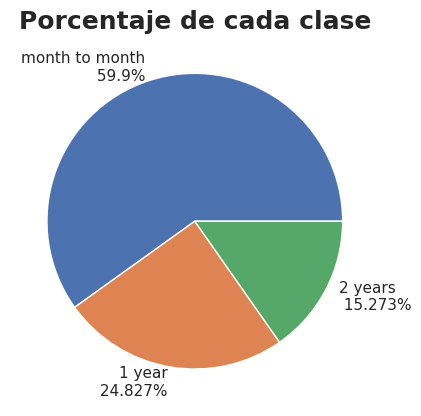

,count
contract_type,
0.0,8985
1.0,3724
2.0,2291


In [ ]:
clases = np.array([data[data.contract_type == 0.0].shape[0],
                    data[data.contract_type == 1.0].shape[0],
                    data[data.contract_type == 2.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 3)) + '%'  for x in clases ]
labels[0] = 'month to month\n ' + labels[0]
labels[1] = '1 year\n ' + labels[1]
labels[2] = '2 years\n ' + labels[2]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()


data['contract_type'].value_counts()

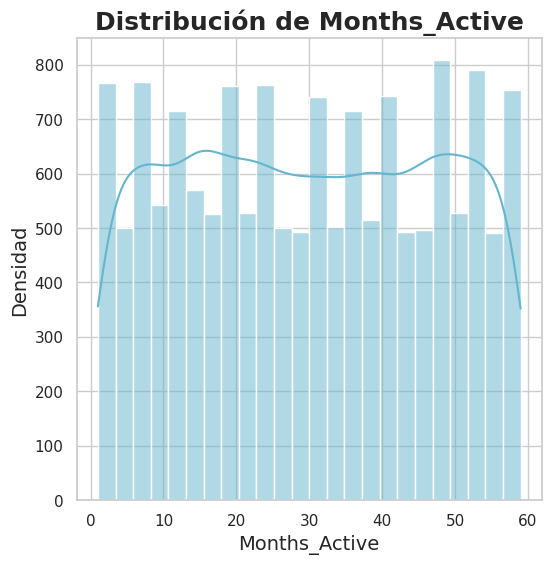

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data['months_active'], kde = True, color = 'c')
plt.title('Distribución de Months_Active', fontsize = 18, fontweight="bold")
plt.xlabel("Months_Active", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

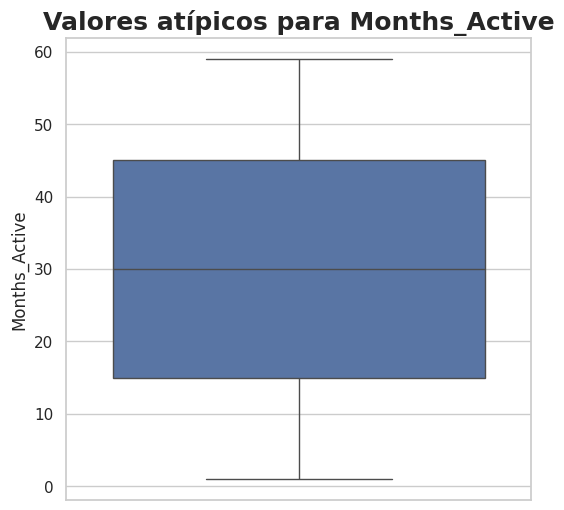

In [ ]:
#REVISION ATIPICOS

plt.figure(figsize=(6,6))
plt.title("Valores atípicos para Months_Active", fontsize=18, fontweight="bold")
plt.ylabel("Months_Active")
sns.boxplot(y='months_active',data=data);

**Comentarios acerca de Months_Active**
+ El cliente con mayor meses de suscripcion activa es de 59.
+ El 50% de los clientes tiene una suscripcion activa de 30 meses o menos.
+ El cliente en promedio tiene 17  meses de suscripcion activa.
+ Inexistencia de valores atipicos(outliers).

# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

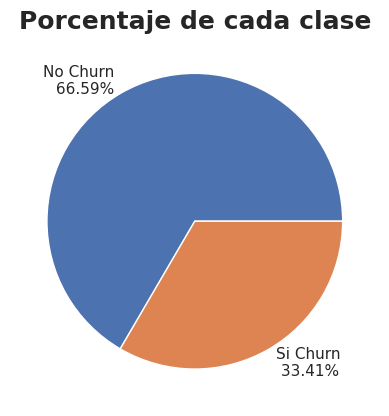

In [ ]:
#CHURN
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.churn == 0.0].shape[0],
                   data[data.churn == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No Churn\n ' + labels[0]
labels[1] = 'Si Churn\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

In [ ]:
data.groupby('churn').size()

,0
churn,
0,9988
1,5012


**Comentario sobre Churn**

La variable Churn indica si el cliente ha abandonado o no el servicio de suscripción, siendo 0 para aquellos que no lo han abandonado y 1 para quienes sí lo han hecho.
Según el gráfico, se observa lo siguiente:

+ El 66.59% de los clientes (9,988) no ha abandonado el servicio.

+ El 33.41% de los clientes (5,012) sí ha abandonado el servicio.

+ La variable presenta una distribucion desbalanceada de clases.

+ La predicción podría verse afectada por un sesgo debido al desbalance de clases en la variable.

### Selección de variables independientes (1 punto)

In [ ]:
#Como se menciono anteriormente, las variables con mayor valor en la matriz
#de correlaccion son las mejores opciones  para seleccionarse como variables independientes
#para tratar de predecedir CHURN
# Calcular la matriz de correlación en el dataframe original
correlation_matrix = data.corr()

# Seleccionar la correlación con la variable 'churn'
churn_correlation = correlation_matrix["churn"]

# Convertir a DataFrame y nombrar la columna
df_correlation = pd.DataFrame(churn_correlation)
df_correlation.columns = ["correlation"]

# Ordenar por correlación
df_correlation.sort_values("correlation", ascending=False)

,correlation
churn,1.000000
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644
contract_type,-0.493645


In [ ]:
#Seleccionar las variables independientes
X = data[churn_correlation.sort_values(ascending=False).index[1:]]
y = data['churn']
#Seleccionamos las 4 variables independientes con mayor correlacion
best = SelectKBest(k=4)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])
#Guardamos los datos en un dataframe llamada X_select
X_selected = X[X.columns[selected]]
X_selected.head(5)


Index(['support_calls', 'has_discount', 'months_active', 'contract_type'], dtype='object')


,support_calls,has_discount,months_active,contract_type
0,2,1,15,0.0
1,4,0,57,1.0
2,1,1,58,1.0
3,4,1,35,0.0
4,4,1,24,0.0


### Separación datos entrenamiento y test (1 punto)

In [ ]:
# Seperacion en data de entranamiento y test con las variables seleccionadasl, 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=29, shuffle=True, stratify=y)

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [ ]:
model_dtc = DecisionTreeClassifier(max_depth=3, criterion = "entropy", random_state=29)

#### Entrenamiento del modelo (1 punto)

In [ ]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=29)

#### Evaluación del modelo

In [ ]:
y_pred_tree = model_dtc.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
def view_matrix(matriz : np.array, clases_labels : list):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Usar clases_labels para xticklabels y yticklabels
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases_labels, yticklabels=clases_labels)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

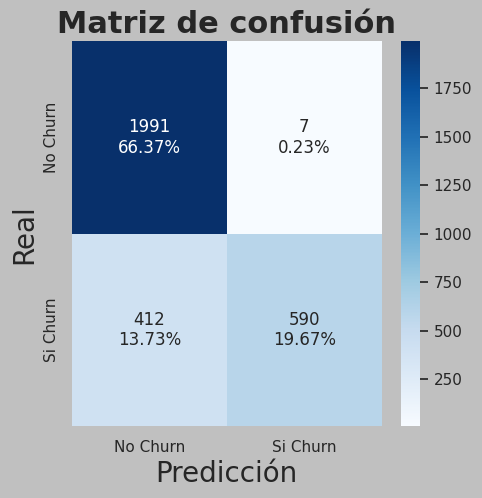

In [ ]:
# Realiza las predicciones
clases_labels=['No Churn', 'Si Churn']
#--
matriz_tree = confusion_matrix(y_test, y_pred_tree)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_tree, clases_labels)


# 9998 Es NO ABANDONO
# 5012 ES SI ABANDONO
#1991+7+412+590=3.000 =20% DE TESTING

✅ **Interpretación**

+ 1.991 Clientes no abandonaron la suscripción(No Churn) y el modelo lo predijo correctamente (esquina superior izquierda)
+ 7 Clientes no abandonaron la suscripcion(No Churn) y el modelo habia predicho que si lo harian(esquina superior derecha)
+ 412 Clientes si abandonaron la suscripcion(Si Churn) y el modelo habia predicho que no lo harian(esquina inferior izquierda)
+ 590 Clientes si abandonaron la suscripcion(Si Churn) y el modelo lo predijo correctamente(esquina inferior derecha)
+ La cantidad de clientes(1991+7+412+590)=3.000, ya que fue lo destinado a testing, el 20% de los 15.000 clientes.

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
#Accuracy
accuracy_dtc = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_dtc}")



Accuracy: 0.8603333333333333


✅ **Interpretación**

Si bien el modelo presenta una accuracy de aproximadamente 86% lo cual es relativamente alto, este valor no garantiza un buen desempeño en la prediccion de Churn, debido al desbalanceo de clases, el modelo puede haber aprendido a detectar la clase mayoritaria. Por eso es importante complementar con otras metricas como recall,precision y F1-score.

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [ ]:
model_nb=GaussianNB()

#### Entrenamiento del modelo - (1 punto)

In [ ]:
model_nb.fit(X_train, y_train)

GaussianNB()

#### Evaluación del modelo - (1 punto)

In [ ]:
y_pred_nb = model_nb.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

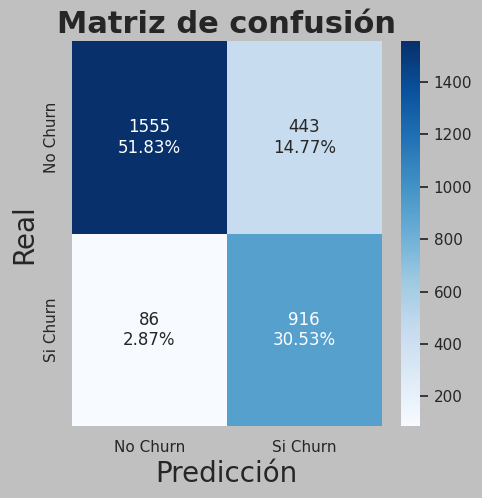

In [ ]:
clases_labels=['No Churn', 'Si Churn']
#-- --
matriz_nb = confusion_matrix(y_test, y_pred_nb)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_nb, clases_labels)

✅ **Interpretación**

+ 1.555 Clientes no abandonaron la suscripción(No Churn) y el modelo lo predijo correctamente (esquina superior izquierda)
+ 443 Clientes no abandonaron la suscripcion(No Churn) y el modelo habia predicho que si lo harian(esquina superior derecha)
+ 86 Clientes si abandonaron la suscripcion(Si Churn) y el modelo habia predicho que no lo harian(esquina inferior izquierda)
+ 916 Clientes si abandonaron la suscripcion(Si Churn) y el modelo lo predijo correctamente(esquina inferior derecha)
+ La cantidad de clientes(1555+443+86+916)=3.000, ya que fue lo destinado a testing, el 20% de los 15.000 clientes.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
#Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb}")

Accuracy: 0.8236666666666667


Si bien el modelo presenta una accuracy de aproximadamente 82% lo cual es relativamente alto, este valor no garantiza un buen desempeño en la prediccion de Churn, debido al desbalanceo de clases, el modelo puede haber aprendido a detectar la clase mayoritaria. Por eso es importante complementar con otras metricas como recall,precision y F1-score.

### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [ ]:
model_rl=LogisticRegression(solver='lbfgs')

#### Entrenamiento del modelo - (1 punto)

In [ ]:
model_rl=model_rl.fit(X_train, y_train)

#### Evaluación del modelo - (1 punto)

In [ ]:
y_pred_rl = model_rl.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

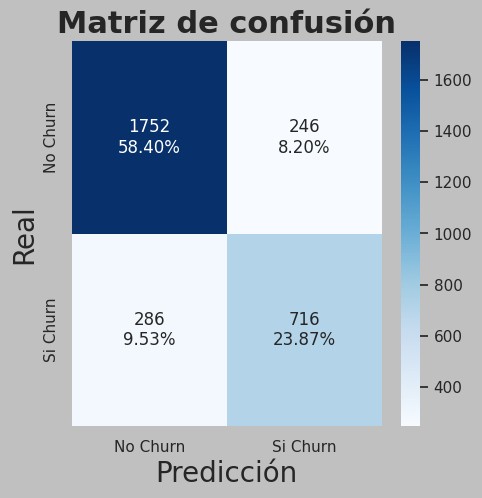

In [ ]:
clases_labels=['No Churn', 'Si Churn']
#-- --
matriz_rl = confusion_matrix(y_test, y_pred_rl)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rl, clases_labels)

✅ **Interpretación**

+ 1.752 Clientes no abandonaron la suscripción(No Churn) y el modelo lo predijo correctamente (esquina superior izquierda)
+ 246 Clientes no abandonaron la suscripcion(No Churn) y el modelo habia predicho que si lo harian(esquina superior derecha)
+ 286 Clientes si abandonaron la suscripcion(Si Churn) y el modelo habia predicho que no lo harian(esquina inferior izquierda)
+ 716 Clientes si abandonaron la suscripcion(Si Churn) y el modelo lo predijo correctamente(esquina inferior derecha)
+ La cantidad de clientes(1752+246+286+716)=3.000, ya que fue lo destinado a testing, el 20% de los 15.000 clientes.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
#Accuracy
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print(f"Accuracy: {accuracy_rl}")

Accuracy: 0.8226666666666667


Si bien el modelo presenta una accuracy de aproximadamente 82% lo cual es relativamente alto, este valor no garantiza un buen desempeño en la prediccion de Churn, debido al desbalanceo de clases, el modelo puede haber aprendido a detectar la clase mayoritaria. Por eso es importante complementar con otras metricas como recall,precision y F1-score.

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [ ]:
model_rf=RandomForestClassifier(n_estimators=50, criterion = "entropy", random_state=29)

#### Entrenamiento del modelo - (1 punto)

In [ ]:
model_rf=model_rf.fit(X_train, y_train)

#### Evaluación del modelo - (1 punto)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

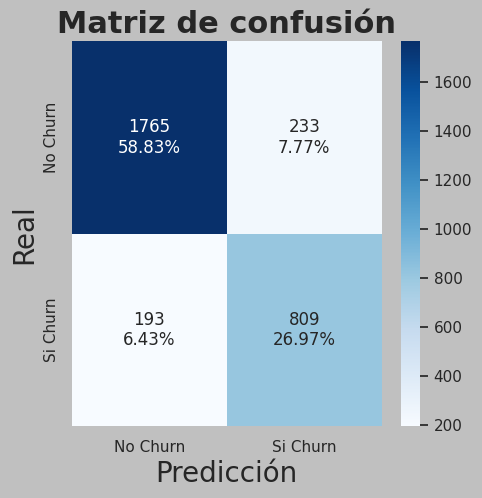

In [ ]:
clases_labels=['No Churn', 'Si Churn']
#-- --
matriz_rf = confusion_matrix(y_test, y_pred_rf)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rf, clases_labels)

✅ **Interpretación**

+ 1.765 Clientes no abandonaron la suscripción(No Churn) y el modelo lo predijo correctamente (esquina superior izquierda)
+ 233 Clientes no abandonaron la suscripcion(No Churn) y el modelo habia predicho que si lo harian(esquina superior derecha)
+ 193 Clientes si abandonaron la suscripcion(Si Churn) y el modelo habia predicho que no lo harian(esquina inferior izquierda)
+ 809 Clientes si abandonaron la suscripcion(Si Churn) y el modelo lo predijo correctamente(esquina inferior derecha)
+ La cantidad de clientes(1765+222+193+809)=3.000, ya que fue lo destinado a testing, el 20% de los 15.000 clientes.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

Accuracy: 0.858


Si bien el modelo presenta una accuracy de aproximadamente 85% lo cual es relativamente alto, este valor no garantiza un buen desempeño en la prediccion de Churn, debido al desbalanceo de clases, el modelo puede haber aprendido a detectar la clase mayoritaria. Por eso es importante complementar con otras metricas como recall,precision y F1-score.

### Comparación de los modelos - (2 puntos)

In [ ]:
print(f"Accuracy Decision Tree: {accuracy_dtc}")
print(f"Accuracy Naive Bayes: {accuracy_nb}")
print(f"Accuracy Regresion Logistica: {accuracy_rl}")
print(f"Accuracy Random Forest: {accuracy_rf}")


Accuracy Decision Tree: 0.8603333333333333
Accuracy Naive Bayes: 0.8236666666666667
Accuracy Regresion Logistica: 0.8226666666666667
Accuracy Random Forest: 0.858


✅ **Interpretación**

Si se considerara únicamente la métrica de accuracy, el modelo Decision Tree sería el más destacado, ya que alcanza una precisión del 86%, la más alta entre los modelos evaluados.

Sin embargo, debido al desbalance de clases presente en la variable Churn, el accuracy no es suficiente para determinar el mejor modelo.

Como el objetivo principal es predecir correctamente los casos positivos de Churn (es decir, identificar a los clientes que abandonarán el servicio), resulta más apropiado comparar los modelos utilizando métricas como F1-Score y ROC AUC.
Por ello, se procede a comparar estas métricas entre los distintos modelos evaluados.

In [ ]:
# Calcular ROC AUC, F1-score y Accuracy para cada modelo
roc_auc_dtc = roc_auc_score(y_test, model_dtc.predict_proba(X_test)[:, 1])
f1_dtc = f1_score(y_test, y_pred_tree)
roc_auc_nb = roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1])
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_rl = roc_auc_score(y_test, model_rl.predict_proba(X_test)[:, 1])
f1_rl = f1_score(y_test, y_pred_rl)
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
f1_rf = f1_score(y_test, y_pred_rf)
# Crear un DataFrame para comparar las métricas
metrics_data = {
    'Modelo': ['Decision Tree', 'Naive Bayes', 'Regresión Logística', 'Random Forest'],
    'Accuracy': [accuracy_dtc, accuracy_nb, accuracy_rl, accuracy_rf],
    'ROC AUC': [roc_auc_dtc, roc_auc_nb, roc_auc_rl, roc_auc_rf],
    'F1-Score': [f1_dtc, f1_nb, f1_rl, f1_rf]
}
df_metrics = pd.DataFrame(metrics_data)

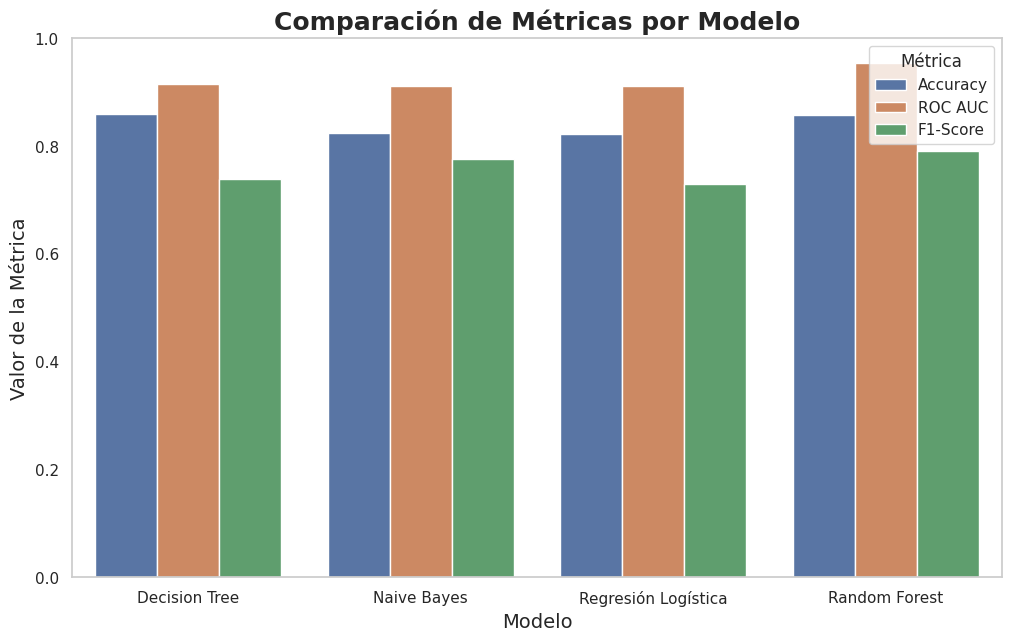

In [ ]:
# Melt the DataFrame to long format for easier plotting
df_metrics_melted = df_metrics.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_metrics_melted)
plt.title('Comparación de Métricas por Modelo', fontsize=18, fontweight="bold")
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Valor de la Métrica', fontsize=14)
plt.ylim(0, 1) # Set the y-axis limit from 0 to 1 for metrics
plt.legend(title='Métrica')
plt.grid(axis='y')
plt.show()

In [ ]:
# Mostrar la tabla de métricas para ver en detalle*
print("Tabla de Comparación de Modelos:")
display(df_metrics)

Tabla de Comparación de Modelos:


,Modelo,Accuracy,ROC AUC,F1-Score
0,Decision Tree,0.860333,0.915270,0.737961
1,Naive Bayes,0.823667,0.910548,0.775942
2,Regresión Logística,0.822667,0.911579,0.729124
3,Random Forest,0.858000,0.953270,0.791585


✅ **Interpretación**
Viendo el grafico y tabla, se puede apreciar que:
  + Decision Tree presenta el mayor Accuracy
  + Random Forest presenta el mayor ROC AUC y F1-Score
  + Regresion Logistica presenta el menor Accuracy y F1-Score
  + Naives Bayes presenta el menor ROC AUC

Dado que la variable churn está desbalanceada, el accuracy no es suficiente para evaluar el rendimiento real del modelo. Por eso se consideran métricas como F1-score, que refleja el equilibrio entre precisión y recall, y ROC AUC, que mide qué tan bien el modelo distingue entre clientes que se van y los que no.

En este caso, Random Forest destaca por tener el mayor F1-score y ROC AUC ademas de contar con el segundo mayor Accuracy, lo que indica que es el modelo más eficaz para identificar clientes en riesgo de abandono sin generar demasiados falsos positivos.

Por lo tanto, se considera que Random Forest es el mejor modelo entre los modelos probados.

